# Data exploration

In this short notebook, we will learn some basic python functions which are helpful to gain a first overview whenever you face an unknown data set.

You will work with a data set that consists of climbing data of [Mount Rainier](https://goo.gl/maps/WyAMb5BRBrgRECNB9). Mount Rainier is a 4,392 meters high stratovolcano in Washington, USA, and is considered difficult to summit. You must download the data set from Blackboard.

We start with importing the required packages: numpy, pandas, and matplotlib.

In [1]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt

Now we load the data set into a pandas data frame, which is standard the representation of a matrix with row and column names in python.

_When using Google Colab, you first need to upload the data set to your notebook. This can be done by `files.upload()` from Google Colab's own python package `google.colab`._

In [3]:
# only use when running this notebook in Google Colab, ignore this cell when running this notebook on your own machine
#from google.colab import files

#climbing_data = files.upload()

In [4]:
# load data as pandas data frames
climbing = pd.read_csv('climbing_statistics.csv')

The first step should always be to see the first few rows of your data set. This can easily be doen with `.head()` when the object preceding it is a pandas data frame. 

In the parentheses of `.head()`, you can specify how many rows you would like to see (default is 5), and the function `.tail()` lets you see the last few rows.

We print here the first 10 rows.

In [8]:
climbing.head(10)

,Date,Route,Attempted,Succeeded,Success Percentage
0,11/27/2015,Disappointment Cleaver,2,0,0.0
1,11/21/2015,Disappointment Cleaver,3,0,0.0
2,10/15/2015,Disappointment Cleaver,2,0,0.0
3,10/13/2015,Little Tahoma,8,0,0.0
4,10/9/2015,Disappointment Cleaver,2,0,0.0
5,10/3/2015,Disappointment Cleaver,10,0,0.0
6,10/3/2015,Disappointment Cleaver,2,0,0.0
7,10/2/2015,Kautz Glacier,2,0,0.0
8,10/2/2015,Disappointment Cleaver,2,0,0.0
9,9/30/2015,Disappointment Cleaver,2,0,0.0


In the rows with indices **5** and **6** has gone something wrong. The Date and Route taken to the summit are exactly the same, so why has this not been summarised in one single row? Such things are very common in real data sets and are part of **data cleaning**. 

We will go through a couple of examples how this data set can be cleaned, i.e., made ready to be used by machine learning models.

In [7]:
# create a new data frame
climbing_clean_0 = pd.DataFrame(index=range(len(climbing)), columns=climbing.columns)

# aggregating the rows when Date and Route are identical
for index, row in climbing.iterrows():
  if (climbing.iloc[(index-1), 0] == climbing.iloc[index, 0] and climbing.iloc[(index-1), 1] == climbing.iloc[index, 1]):
    climbing_clean_0.iloc[index, 0] = climbing.iloc[index, 0]
    climbing_clean_0.iloc[index, 1] = climbing.iloc[index, 1]
    climbing_clean_0.iloc[index, 2] = climbing.iloc[(index-1), 2] + climbing.iloc[index, 2]
    climbing_clean_0.iloc[index, 3] = climbing.iloc[(index-1), 3] + climbing.iloc[index, 3]
    # recalculate the success percentage
    climbing_clean_0.iloc[index, 4] = climbing.iloc[index, 3] / climbing.iloc[index, 2]
  else:
    climbing_clean_0.iloc[index] = climbing.iloc[index]
    climbing_clean_0.iloc[index, 4] = climbing.iloc[index, 3] / climbing.iloc[index, 2]

In [9]:
# check
climbing_clean_0.head(10)

,Date,Route,Attempted,Succeeded,Success Percentage
0,11/27/2015,Disappointment Cleaver,2,0,0
1,11/21/2015,Disappointment Cleaver,3,0,0
2,10/15/2015,Disappointment Cleaver,2,0,0
3,10/13/2015,Little Tahoma,8,0,0
4,10/9/2015,Disappointment Cleaver,2,0,0
5,10/3/2015,Disappointment Cleaver,10,0,0
6,10/3/2015,Disappointment Cleaver,12,0,0
7,10/2/2015,Kautz Glacier,2,0,0
8,10/2/2015,Disappointment Cleaver,2,0,0
9,9/30/2015,Disappointment Cleaver,2,0,0


You can see that we were able to sum up the number of Attempted summits, but still have both rows in our data frame. Pandas has a one-line command to delete the first of these duplicates and only keep the last.

In [10]:
climbing_clean_0.drop_duplicates(subset=['Date', 'Route'], keep='last', inplace=True)

In [11]:
# check
climbing_clean_0.head(10)

,Date,Route,Attempted,Succeeded,Success Percentage
0,11/27/2015,Disappointment Cleaver,2,0,0
1,11/21/2015,Disappointment Cleaver,3,0,0
2,10/15/2015,Disappointment Cleaver,2,0,0
3,10/13/2015,Little Tahoma,8,0,0
4,10/9/2015,Disappointment Cleaver,2,0,0
6,10/3/2015,Disappointment Cleaver,12,0,0
7,10/2/2015,Kautz Glacier,2,0,0
8,10/2/2015,Disappointment Cleaver,2,0,0
9,9/30/2015,Disappointment Cleaver,2,0,0
10,9/28/2015,Disappointment Cleaver,12,4,0.333333


Now we have the data frame that we wanted. The indices can simply be reset with `.reset_index()`.

In [12]:
climbing_clean_0.reset_index(inplace=True)
climbing_clean_0.drop(columns='index', inplace=True)  # with reset_index() a new column is created that we want to drop

In [13]:
# check
climbing_clean_0.head(10)

,Date,Route,Attempted,Succeeded,Success Percentage
0,11/27/2015,Disappointment Cleaver,2,0,0
1,11/21/2015,Disappointment Cleaver,3,0,0
2,10/15/2015,Disappointment Cleaver,2,0,0
3,10/13/2015,Little Tahoma,8,0,0
4,10/9/2015,Disappointment Cleaver,2,0,0
5,10/3/2015,Disappointment Cleaver,12,0,0
6,10/2/2015,Kautz Glacier,2,0,0
7,10/2/2015,Disappointment Cleaver,2,0,0
8,9/30/2015,Disappointment Cleaver,2,0,0
9,9/28/2015,Disappointment Cleaver,12,4,0.333333


Next, we find other manual mistakes in the data set. After having reviewed some random rows by hand, we find that on some dates there were more Succeeded summits than Attempted summits. This must be a mistake and we delete these rows.

In [14]:
# deleting rows, where number of successes is higher than number of attempts
mistake_rows = climbing_clean_0[climbing_clean_0['Succeeded'] > climbing_clean_0['Attempted']]

In [15]:
# check
mistake_rows

,Date,Route,Attempted,Succeeded,Success Percentage
111,7/27/2015,Emmons-Winthrop,15,16,1
674,7/11/2014,Kautz Glacier,11,12,1.09091


In [16]:
# delete these rows
climbing_clean_1 = climbing_clean_0[~climbing_clean_0.isin(mistake_rows)].dropna()

In [17]:
# deleted?
climbing_clean_1[climbing_clean_1['Succeeded'] > climbing_clean_1['Attempted']]

,Date,Route,Attempted,Succeeded,Success Percentage


Success! All rows are deleted which had a higher number of successes than attempts.

In [18]:
# reset index again
climbing_clean_1.reset_index(inplace=True)
climbing_clean_1.drop(columns='index', inplace=True)

In [19]:
# check
climbing_clean_1.head()

,Date,Route,Attempted,Succeeded,Success Percentage
0,11/27/2015,Disappointment Cleaver,2,0,0
1,11/21/2015,Disappointment Cleaver,3,0,0
2,10/15/2015,Disappointment Cleaver,2,0,0
3,10/13/2015,Little Tahoma,8,0,0
4,10/9/2015,Disappointment Cleaver,2,0,0


It's always a good idea to compute some basic statistics of our data in the beginning. We start with simple means and standard deviations.

In [20]:
for col in ['Attempted', 'Succeeded', 'Success Percentage']:
  print('Mean of {}'.format(col), climbing_clean_1[col].mean())
  print('Std of {}'.format(col), climbing_clean_1[col].std())
  print('-----------')

Mean of Attempted 6.671597633136095
Std of Attempted 6.03474981605562
-----------
Mean of Succeeded 2.9201183431952664
Std of Succeeded 4.491577022808926
-----------
Mean of Success Percentage 0.3874705422782347
Std of Success Percentage 0.4635537827262483
-----------


We can also plot the attempts and successes over time. Our first column is already a date, but pandas has a special data type for dates, which it calls `datetime`.

Let's first see in which format our column `Date` saved its values at. 

In [21]:
# check data type
type(climbing_clean_1['Date'][0])

str

We see its in the string format. Let's convert it to `datetime` now.

In [22]:
climbing_clean_1['Date']= pd.to_datetime(climbing_clean_1['Date'])

In [23]:
# check data type again
type(climbing_clean_1['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

This makes it now very easy to plot histograms over time.

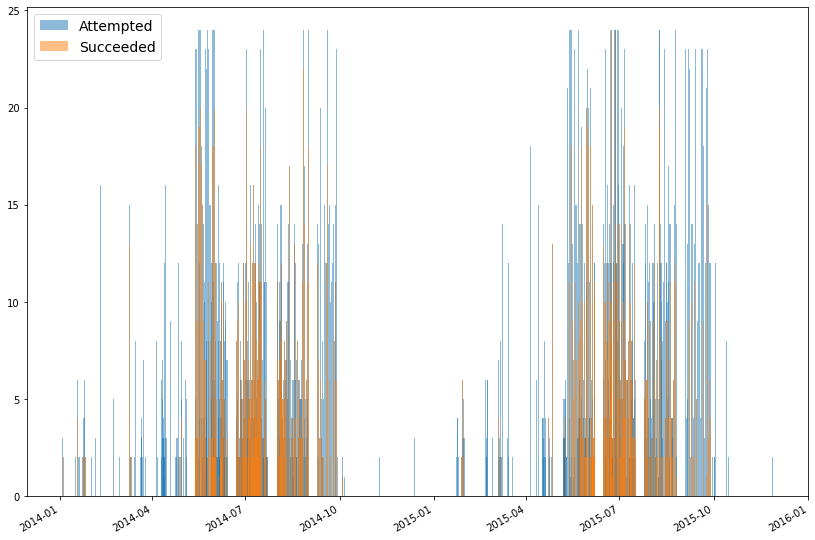

In [24]:
fig, ax = plt.subplots(figsize=(14,10))

for col in ['Attempted', 'Succeeded']:
  ax.bar(climbing_clean_1['Date'], climbing_clean_1[col], alpha=0.5, label=col)
ax.legend(fontsize=14)

# rotates and right aligns the x labels, and moves the bottom of the axes up to make room for them
fig.autofmt_xdate();

We can see that most attempts are over the summer, 